# Janata Hack eCommerce Analytics

Determine the gender of shopper from ecommerce website data

https://datahack.analyticsvidhya.com/contest/janatahack-e-commerce-analytics-ml-hackathon

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

In [4]:
test = pd.read_csv('../input/janatahack/test_Yix80N0.csv')
train = pd.read_csv('../input/janatahack/train_8wry4cB.csv')

In [5]:
test.head()

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [6]:
train.shape

(10500, 5)

It seems there is lot of information hidden in the ProductList variable. We need to extract as much information as possible. Here are the new features I can think which we can come up from this data :
    - Time spent in a session and other date time features
    - category, sub-category, sub-sub category and the product
    - number of products browsed per session
    - number of categories browsed per session
    - number of products per hour

In [7]:
train.nunique()

session_id     10500
startTime       8815
endTime         8803
ProductList     9402
gender             2
dtype: int64

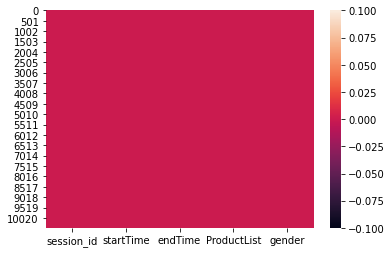

In [8]:
sns.heatmap(train.isnull())
plt.show()

Awesome! No missing data :)

In [9]:
df=train.append(test,ignore_index=True)
df['n_product']  = df['ProductList'].apply(lambda s : s.count(';')+1)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [10]:
df['n_product'].unique()

array([ 4,  7,  1,  3,  2,  6, 14,  5,  9, 11, 10, 27, 19,  8, 13, 15, 12,
       24, 29, 17, 25, 16, 36, 18, 20, 30, 21, 22, 35, 43, 23, 31, 28])

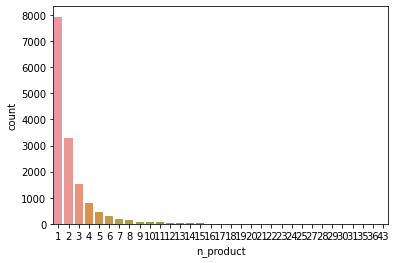

In [11]:
sns.countplot(df['n_product'])

In [12]:
new = df['ProductList'].str.split(";",expand = True)
new.fillna(value=0, inplace=True)

In [13]:
new.head(15)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,A00002/B00003/C00006/D28435/,A00002/B00003/C00006/D02554/,A00002/B00003/C00006/D28436/,A00002/B00003/C00006/D28437/,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A00001/B00009/C00031/D29404/,A00001/B00009/C00031/D02617/,A00001/B00009/C00031/D29407/,A00001/B00009/C00031/D29410/,A00001/B00009/C00031/D29411/,A00001/B00009/C00031/D25444/,A00001/B00009/C00031/D29418/,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A00002/B00001/C00020/D16944/,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A00002/B00004/C00018/D10284/,A00002/B00004/C00018/D10285/,A00002/B00004/C00018/D10286/,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A00001/B00001/C00012/D30805/,A00001/B00001/C00012/D30806/,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,A00002/B00002/C00081/D25039/,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,A00002/B00011/C00180/D18487/,A00002/B00011/C00114/D18459/,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,A00002/B00001/C00059/D15254/,A00002/B00001/C00059/D00900/,A00002/B00002/C00002/D02063/,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,A00002/B00001/C00010/D06129/,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,A00002/B00001/C00010/D12841/,A00002/B00002/C00112/D20047/,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
new1 = new[0].str.split("/",expand=True)

In [15]:
new1.drop(labels = 4, axis = 1, inplace = True)

In [16]:
new1= new1.rename(columns={0: "cat", 1:"scat",2:"sscat", 3:"prod"})

In [17]:
df1 = pd.concat([df,new1],axis=1)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
ProductList    15000 non-null object
endTime        15000 non-null object
gender         10500 non-null object
session_id     15000 non-null object
startTime      15000 non-null object
n_product      15000 non-null int64
cat            15000 non-null object
scat           15000 non-null object
sscat          15000 non-null object
prod           15000 non-null object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [19]:
dateparser = lambda x : pd.datetime.strptime(x,"%d/%m/%y %H:%M")
df1['startTime'] = df1['startTime'].apply(dateparser)
df1['endTime'] = df1['endTime'].apply(dateparser)

In [20]:
df1['time_difference'] = (pd.to_datetime(df1['endTime']) - pd.to_datetime(df1['startTime'])).dt.total_seconds()/60
df1['st_month'] = pd.to_datetime(df1['startTime']).dt.month
df1['st_day'] = pd.to_datetime(df1['startTime']).dt.day
df1['st_hour'] = pd.to_datetime(df1['startTime']).dt.hour


In [21]:
def prodperhour(df):

    if (df['time_difference'] == 0):
        return 0.0
    else:
        return df['n_product']/df['time_difference']

df1['prodperhour'] = df1.apply(prodperhour, axis = 1)
                         
                        # ['red' if x == 'Z' else 'green' for x in df['Set']]

In [22]:
df1.head(10)

,ProductList,endTime,gender,session_id,startTime,n_product,cat,scat,sscat,prod,time_difference,st_month,st_day,st_hour,prodperhour
0,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,2014-12-15 18:12:00,female,u16159,2014-12-15 18:11:00,4,A00002,B00003,C00006,D28435,1.0,12,15,18,4.000000
1,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,2014-12-16 14:41:00,male,u10253,2014-12-16 14:35:00,7,A00001,B00009,C00031,D29404,6.0,12,16,14,1.166667
2,A00002/B00001/C00020/D16944/,2014-12-01 15:58:00,female,u19037,2014-12-01 15:58:00,1,A00002,B00001,C00020,D16944,0.0,12,1,15,0.000000
3,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,2014-11-23 03:00:00,female,u14556,2014-11-23 02:57:00,3,A00002,B00004,C00018,D10284,3.0,11,23,2,1.000000
4,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,2014-12-17 16:46:00,male,u24295,2014-12-17 16:44:00,2,A00001,B00001,C00012,D30805,2.0,12,17,16,1.000000
5,A00002/B00002/C00081/D25039/,2014-12-12 15:31:00,female,u20964,2014-12-12 15:31:00,1,A00002,B00002,C00081,D25039,0.0,12,12,15,0.000000
6,A00002/B00011/C00180/D18487/;A00002/B00011/C00...,2014-12-05 19:34:00,female,u20981,2014-12-05 19:33:00,2,A00002,B00011,C00180,D18487,1.0,12,5,19,2.000000
7,A00002/B00001/C00059/D15254/;A00002/B00001/C00...,2014-12-09 16:06:00,male,u15947,2014-12-09 16:02:00,3,A00002,B00001,C00059,D15254,4.0,12,9,16,0.750000
8,A00002/B00001/C00010/D06129/,2014-11-25 11:55:00,male,u18193,2014-11-25 11:55:00,1,A00002,B00001,C00010,D06129,0.0,11,25,11,0.000000
9,A00002/B00001/C00010/D12841/;A00002/B00002/C00...,2014-12-06 16:17:00,female,u21820,2014-12-06 16:16:00,2,A00002,B00001,C00010,D12841,1.0,12,6,16,2.000000


In [23]:
df1['cat'].unique()

array(['A00002', 'A00001', 'A00003', 'A00004', 'A00005', 'A00006',
       'A00011', 'A00007', 'A00010', 'A00008', 'A00009'], dtype=object)

In [24]:
df2=df1
a=0
df2['n_cat']=0
cols = []

for i in df1['cat'].unique() :
    #print(i)
    #df2.head()
    
    col = 'n_'+i
    cols.append(col)
    df2[col] = df2.ProductList.str.contains(i)
    df2[col] = df2[col].apply(lambda x : 1 if x else 0)
    df2['n_cat'] = df2[col] + df2['n_cat']

#df2.drop(columns = cols,inplace=True)

print(df2.columns)


Index(['ProductList', 'endTime', 'gender', 'session_id', 'startTime',
       'n_product', 'cat', 'scat', 'sscat', 'prod', 'time_difference',
       'st_month', 'st_day', 'st_hour', 'prodperhour', 'n_cat', 'n_A00002',
       'n_A00001', 'n_A00003', 'n_A00004', 'n_A00005', 'n_A00006', 'n_A00011',
       'n_A00007', 'n_A00010', 'n_A00008', 'n_A00009'],
      dtype='object')


In [25]:
df3=df2

df3['n_scat']=0
cols = []

for i in df1['scat'].unique() :
    #print(i)
    #df2.head()
    col = 'n_'+i
    cols.append(col)
    df3[col] = df3.ProductList.str.contains(i)
    df3[col] = df3[col].apply(lambda x : 1 if x else 0)
    df3['n_scat'] = df3[col] + df3['n_scat']

#df3.drop(columns = cols,inplace=True)


print(df3.columns)
df1=df3

Index(['ProductList', 'endTime', 'gender', 'session_id', 'startTime',
       'n_product', 'cat', 'scat', 'sscat', 'prod',
       ...
       'n_B00075', 'n_B00073', 'n_B00082', 'n_B00046', 'n_B00078', 'n_B00076',
       'n_B00085', 'n_B00033', 'n_B00091', 'n_B00088'],
      dtype='object', length=112)


In [26]:
df4=df3

df4['n_sscat']=0
cols = []

for i in df1['sscat'].unique() :
    #print(i)
    #df2.head()
    col = 'n_'+i
    cols.append(col)
    df4[col] = df4.ProductList.str.contains(i)
    df4[col] = df4[col].apply(lambda x : 1 if x else 0)
    df4['n_sscat'] = df4[col] + df4['n_scat']

#df3.drop(columns = cols,inplace=True)


print(df4.columns)
df1=df4

Index(['ProductList', 'endTime', 'gender', 'session_id', 'startTime',
       'n_product', 'cat', 'scat', 'sscat', 'prod',
       ...
       'n_C00347', 'n_C00381', 'n_C00380', 'n_C00169', 'n_C00316', 'n_C00236',
       'n_C00181', 'n_C00262', 'n_C00279', 'n_C00399'],
      dtype='object', length=469)


In [27]:
# df4=df1

# cols = []

# for i in df1['prod'].unique() :
#     #print(i)
#     #df2.head()
#     col = 'n_'+i
#     cols.append(col)
#     df4[col] = df4.ProductList.str.contains(i)
#     df4[col] = df4[col].apply(lambda x : 1 if x else 0)
#     #df4['n_sscat'] = df4[col] + df4['n_scat']

# #df3.drop(columns = cols,inplace=True)


# print(df4.columns)
# df1=df4

In [28]:
df1.drop(columns=['endTime','startTime','ProductList'],inplace=True)

In [29]:
df1.head()


,gender,session_id,n_product,cat,scat,sscat,prod,time_difference,st_month,st_day,...,n_C00347,n_C00381,n_C00380,n_C00169,n_C00316,n_C00236,n_C00181,n_C00262,n_C00279,n_C00399
0,female,u16159,4,A00002,B00003,C00006,D28435,1.0,12,15,...,0,0,0,0,0,0,0,0,0,0
1,male,u10253,7,A00001,B00009,C00031,D29404,6.0,12,16,...,0,0,0,0,0,0,0,0,0,0
2,female,u19037,1,A00002,B00001,C00020,D16944,0.0,12,1,...,0,0,0,0,0,0,0,0,0,0
3,female,u14556,3,A00002,B00004,C00018,D10284,3.0,11,23,...,0,0,0,0,0,0,0,0,0,0
4,male,u24295,2,A00001,B00001,C00012,D30805,2.0,12,17,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df1['n_cat'].value_counts()

1    14423
2      557
3       20
Name: n_cat, dtype: int64

In [31]:

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
#cols = ['prod']

df1 = pd.get_dummies(data = df1, columns = ['prod'])
#df2.drop(columns='st_month',axis=1,inplace=True)

#df1 = df1.drop(col['sex','region','smoker'],axis=1)

#  for a in cols :
#     df1[a] = le.fit_transform(df1[a])
df1.head()
#df1 = pd.concat([df1,df2],axis=1)

df1.drop(columns=['cat','scat','sscat'],axis=1,inplace=True)

In [32]:
 df1.columns[df1.columns.duplicated()]

Index([], dtype='object')

In [33]:
df_train=df1[df1['gender'].isnull()==False].copy()
df_test=df1[df1['gender'].isnull()==True].copy()

print(df_train.shape,df_test.shape)

(10500, 11540) (4500, 11540)


In [34]:
test_ids = df_test['session_id'] 

In [35]:
df_train.head()

,gender,session_id,n_product,time_difference,st_month,st_day,st_hour,prodperhour,n_cat,n_A00002,...,prod_D36050,prod_D36053,prod_D36054,prod_D36062,prod_D36065,prod_D36075,prod_D36098,prod_D36100,prod_D36117,prod_D36122
0,female,u16159,4,1.0,12,15,18,4.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
1,male,u10253,7,6.0,12,16,14,1.166667,1,0,...,0,0,0,0,0,0,0,0,0,0
2,female,u19037,1,0.0,12,1,15,0.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
3,female,u14556,3,3.0,11,23,2,1.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
4,male,u24295,2,2.0,12,17,16,1.000000,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_train['gender']=df_train['gender'].apply(lambda x : 1 if x == 'male' else 0)
df_train.drop(columns='session_id',axis=1, inplace=True)
df_test.drop(columns=['gender','session_id'],axis=1, inplace=True)

In [37]:
df_train.head()

,gender,n_product,time_difference,st_month,st_day,st_hour,prodperhour,n_cat,n_A00002,n_A00001,...,prod_D36050,prod_D36053,prod_D36054,prod_D36062,prod_D36065,prod_D36075,prod_D36098,prod_D36100,prod_D36117,prod_D36122
0,0,4,1.0,12,15,18,4.000000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7,6.0,12,16,14,1.166667,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0.0,12,1,15,0.000000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,3.0,11,23,2,1.000000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2.0,12,17,16,1.000000,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_test.head()

,n_product,time_difference,st_month,st_day,st_hour,prodperhour,n_cat,n_A00002,n_A00001,n_A00003,...,prod_D36050,prod_D36053,prod_D36054,prod_D36062,prod_D36065,prod_D36075,prod_D36098,prod_D36100,prod_D36117,prod_D36122
10500,1,0.0,12,8,13,0.000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10501,1,0.0,12,19,13,0.000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10502,1,0.0,12,1,10,0.000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10503,4,3.0,12,8,20,1.333333,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10504,1,0.0,12,15,19,0.000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x = df_train.drop('gender',axis=1)
y = df_train['gender']

In [40]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)

Modeling

In [48]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score

def disp_confusion_matrix(model, x, y):
    ypred = model.predict(x)
    cm = confusion_matrix(y,ypred)
    ax = sns.heatmap(cm,annot=True,fmt='d')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    print('Accuracy =',accuracy)
    print('Precision =',precision)
    print('Recall =',recall)
    print('F1 Score =',f1)

def disp_roc_curve(model, xtest, ytest):
    yprob = model.predict_proba(xtest)
    fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
    roc_auc = roc_auc_score(ytest,yprob[:,1])

    print('ROC AUC =', roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

Feature Selection

In [49]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(xtrain, ytrain)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [50]:
selected_feat= xtrain.columns[(sel.get_support())]
len(selected_feat)

11538

In [51]:
df1[selected_feat].head()

,n_product,time_difference,st_month,st_day,st_hour,prodperhour,n_cat,n_A00002,n_A00001,n_A00003,...,prod_D36050,prod_D36053,prod_D36054,prod_D36062,prod_D36065,prod_D36075,prod_D36098,prod_D36100,prod_D36117,prod_D36122
0,4,1.0,12,15,18,4.000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,6.0,12,16,14,1.166667,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,12,1,15,0.000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,11,23,2,1.000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2.0,12,17,16,1.000000,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_train=df1[df1['gender'].isnull()==False].copy()
df_test=df1[df1['gender'].isnull()==True].copy()

print(df_train.shape,df_test.shape)

(10500, 11540) (4500, 11540)


In [53]:
df_train['gender']=df_train['gender'].apply(lambda x : 1 if x == 'male' else 0)
df_train.drop(columns='session_id',axis=1, inplace=True)
df_test.drop(columns=['gender','session_id'],axis=1, inplace=True)

In [54]:
x = df_train.drop('gender',axis=1)
y = df_train['gender']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
print('Training set score = {:.3f}'.format(rf.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(rf.score(xtest,ytest)))

In [ ]:


disp_confusion_matrix(rf, xtest, ytest)
disp_roc_curve(rf, xtest, ytest)

In [ ]:

rf.fit(x,y)
test_prob = rf.predict_proba(df_test)[:,1]
df_rf = pd.DataFrame({'session_id':test_ids,'gender':test_prob})


In [ ]:
import time
times = time.strftime("%Y%m%d-%H%M%S")

th = 0.5

df_rf['gender'] = df_rf['gender'].apply(lambda x : 'male' if x>th else 'female')

In [ ]:
df_rf['gender'].value_counts()


In [ ]:
import time
times = time.strftime("%Y%m%d-%H%M%S")
df_rf.to_csv('submission-rf_'+times+'.csv',index=False)

In [ ]:
pd.DataFrame({'Features':x.columns, 'Importance':rf.feature_importances_}).sort_values(by='Importance',ascending=False)

Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(xtrain,ytrain)
print('Training set score = {:.3f}'.format(xgb.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(xgb.score(xtest,ytest)))

In [ ]:

disp_confusion_matrix(xgb, xtest, ytest)
disp_roc_curve(xgb, xtest, ytest)

In [ ]:
xgb.fit(x,y)
test_prob = xgb.predict_proba(df_test)[:,1]
df_xgb = pd.DataFrame({'session_id':test_ids,'gender':test_prob})
df_xgb.head()

In [ ]:
df_xgb['gender'] = df_xgb['gender'].apply(lambda x : 'male' if x>0.5 else 'female')



In [ ]:
df_xgb['gender'].value_counts()

In [ ]:
import time
times = time.strftime("%Y%m%d-%H%M%S")
df_xgb.to_csv('submission-xgb'+times+'.csv',index=False)

In [ ]:
arr=[100,150,200,250]
cv_scores = []
for a in arr:
    model = XGBClassifier(objective='binary:logistic', n_jobs=4, n_estimators=a)
    cv_score = cross_val_score(model, x, y, cv=5, scoring='roc_auc')
    print(a, ':', cv_score)
    cv_scores.append(cv_score)
    
fig, ax = plt.subplots(figsize=(14,6))
plt.boxplot(cv_scores)
ax.set_xticklabels(arr)
plt.xlabel('n')
plt.ylabel('roc_auc')
plt.show()

In [ ]:
param_grid = {
    'max_depth':[5,6],
    'subsample':[0.8,0.9,1],
    'colsample_bytree': [0.6,0.8,1],
    'min_child_weight': [0.5,1],
    'gamma': [0,0.5,1]
}
xgb = XGBClassifier(objective='binary:logistic', n_jobs=4, n_estimators=100)
xgb_grid = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=4)
xgb_grid.fit(x, y)

In [ ]:

xgb_best = xgb_grid.best_estimator_
disp_confusion_matrix(xgb_best, xtest, ytest)
disp_roc_curve(xgb_best, xtest, ytest)

In [ ]:

xgb_best.fit(x,y)
test_prob = xgb_best.predict_proba(df_test)[:,1]
df_xgbgs = pd.DataFrame({'session_id':test_ids,'gender':test_prob})
df_xgbgs.head()

In [ ]:
import time
times = time.strftime("%Y%m%d-%H%M%S")
df_xgbgs['gender'] = df_xgbgs['gender'].apply(lambda x : 'male' if x>0.5 else 'female')
df_xgbgs.to_csv('submission-xgbgs'+times+'.csv',index=False)

In [ ]:

df_rfxgb=df_rf
df_rfxgb['gender']=0.8*df_rf['gender']+0.2*df_xgb['gender']

In [ ]:
import time
times = time.strftime("%Y%m%d-%H%M%S")
df_rfxgb['gender'] = df_rfxgb['gender'].apply(lambda x : 'male' if x>0.5 else 'female')
df_rfxgb.to_csv('submission-rfxgb_'+times+'.csv',index=False)

LGB

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(xtrain,ytrain)
print('Training set score = {:.3f}'.format(lgb.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(lgb.score(xtest,ytest)))

In [ ]:
disp_confusion_matrix(lgb, xtest, ytest)
disp_roc_curve(lgb, xtest, ytest)

In [ ]:
arr=[-1,10,20,30,50]
cv_scores = []
for a in arr:
    model = LGBMClassifier(objective='binary', n_jobs=4, boosting_type='gbdt', n_estimators=100, max_depth=a)
    cv_score = cross_val_score(model, x, y, cv=5, scoring='roc_auc')
    print(a, ':', cv_score)
    cv_scores.append(cv_score)
    
fig, ax = plt.subplots(figsize=(14,6))
plt.boxplot(cv_scores)
ax.set_xticklabels(arr)
plt.xlabel('n')
plt.ylabel('roc_auc')
plt.show()

In [ ]:
param_grid = {
    'num_leaves':[40,60],
    'max_depth':[-1,10],
    'subsample':[0.8,0.9,1],
    'colsample_bytree': [0.6,0.8,1],
    'min_child_samples': [20,10,30],
    'min_split_gain':[0,0.5,1]
}
lgb = LGBMClassifier(objective='binary', n_jobs=4, boosting_type='gbdt', learning_rate=0.01, n_estimators=100, silent=False)
lgb_grid = GridSearchCV(lgb, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=4)
lgb_grid.fit(x, y)

In [ ]:
lgb_best = lgb_grid.best_estimator_
disp_confusion_matrix(lgb_best, xtest, ytest)
disp_roc_curve(lgb_best, xtest, ytest)

In [ ]:
lgb_best.fit(x,y)
test_prob = lgb_best.predict_proba(df_test)[:,1]
df_lgbgs = pd.DataFrame({'session_id':test_ids,'gender':test_prob})
df_lgbgs.head()

In [ ]:
import time
times = time.strftime("%Y%m%d-%H%M%S")
df_lgbgs['gender'] = df_lgbgs['gender'].apply(lambda x : 'male' if x>0.5 else 'female')
df_lgbgs.to_csv('submission-lgbgs'+times+'.csv',index=False)

CatBoost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb = CatBoostClassifier()
cb.fit(xtrain,ytrain)
print('Training set score = {:.3f}'.format(cb.score(xtrain,ytrain)))
print('Test set score = {:.3f}'.format(cb.score(xtest,ytest)))

In [ ]:
disp_confusion_matrix(cb, xtest, ytest)
disp_roc_curve(cb, xtest, ytest)

In [ ]:
param_grid = {
    'depth':[2, 3, 4],
    'learning_rate' : [0.01, 0.05, 0.1],
    'loss_function': ['Logloss', 'CrossEntropy'],
    'l2_leaf_reg':np.logspace(-20, -19, 3)
}

cb = CatBoostClassifier(iterations=2500,
                            eval_metric = 'Accuracy',
                            leaf_estimation_iterations = 10)

cb_grid = GridSearchCV(cb, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=4) 
cb_grid.fit(x, y)

In [ ]:
cb_best = cb_grid.best_estimator_
disp_confusion_matrix(cb_best, xtest, ytest)
disp_roc_curve(cb_best, xtest, ytest)

In [ ]:

cb_best.fit(x,y)
test_prob = cb_best.predict_proba(df_test)[:,1]
df_cbgs = pd.DataFrame({'session_id':test_ids,'gender':test_prob})
df_cbgs.head()

In [ ]:
import time
times = time.strftime("%Y%m%d-%H%M%S")
df_cbgs['gender'] = df_cbgs['gender'].apply(lambda x : 'male' if x>0.5 else 'female')
df_Cbgs.to_csv('submission-lgbgs'+times+'.csv',index=False)